<a href="https://colab.research.google.com/github/baselm/dataviz/blob/master/dataviz_exp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Visualization using Matplotlib

In [0]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd


Importing Matplotlib

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In this section, we will see some examples of standard plots, such as lines, curves, scatter plots, and bar plots. In the next sections, we will also see images and maps. But Matplotlib offers far more plot types than what we will cover here, including 3D plots, geometrical shapes, vector fields, and so on

### Curves

Drawing a curve with Matplotlib actually means drawing small, successive line segments that give the illusion of a smooth curve when the number of lines is large enough. To plot a mathematical function, one plots samples of this function within a given interval just as NumPy represents functions as arrays with sampled value

For example, a time-dependent signal can be represented as a one-dimensional vector of sampled values at regular time intervals (for example, every 1 millisecond at a 1 kHz sampling frequency), such that one second of signal is represented as
a 1000-unit long vector. The function plot can be used to draw this signal on the screen, for example:

In [0]:
y =np.random.randn(1000)

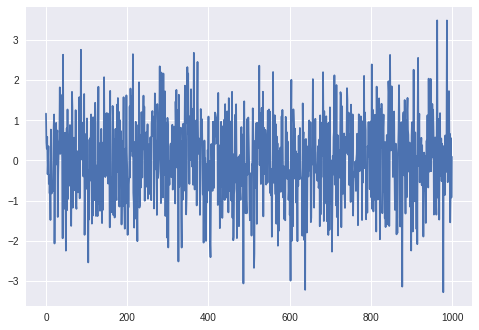

In [16]:
# Let us draw the first data
plt.plot(y)

Here, we generate a vector with random values following independent normal random variables. The resulting signal is a so-called white noise signal, a random signal with a flat power spectral density. When plotting the figure in the notebook with the --pylab inline option, Matplotlib generates an image representing this curve, and the image is then automatically inserted in the output cell

In [0]:
%matplotlib inline

After running this command (it needs to be done only once per kernel/session), any cell within the notebook that creates a plot will embed a PNG image of the resulting graphic:

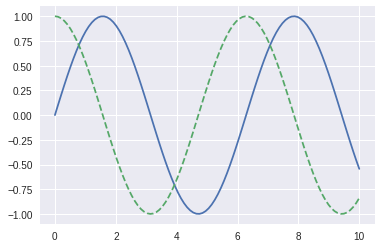

In [21]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig() command. For example, to save the previous figure as a PNG file, you can run this:

In [0]:
## Saving Figures to File

In [0]:
fig.savefig('my_figure.png')

We now have a file called my_figure.png in the current working directory:

In [26]:
!ls -lh my_figure.png

-rw-r--r-- 1 root root 24K Mar 18 14:26 my_figure.png


# Data Exploration Analysis

Load a dataset. For this exercise we need to work on the housing data set of california

In [0]:
housing = pd.read_csv('sample_data/california_housing_train.csv')

In [31]:
# Let’s take a look at the top five rows using the DataFrame’s head() method:
housing.head() 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
longitude             17000 non-null float64
latitude              17000 non-null float64
housing_median_age    17000 non-null float64
total_rooms           17000 non-null float64
total_bedrooms        17000 non-null float64
population            17000 non-null float64
households            17000 non-null float64
median_income         17000 non-null float64
median_house_value    17000 non-null float64
dtypes: float64(9)
memory usage: 1.2 MB


All attributes are numerical, except the ocean_proximity field. Its type is object, so it could hold any kind of Python object, but since you loaded this data from a CSV file you know that it must be a text attribute. When you looked at the top five rows, you probably noticed that the values in that column were repetitive, which means that it is probably a categorical attribute. You can find out what categories exist and how many districts belong to each category by using the value_counts() method:

In [0]:
housing["ocean_proximity"].value_counts()

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute

A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset, and it will plot a histogram for each numerical attribute. For example, you can see that slightly over 800 districts have a median_house_value equal to about $500,000.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efec361c240>,
      dtype=object)

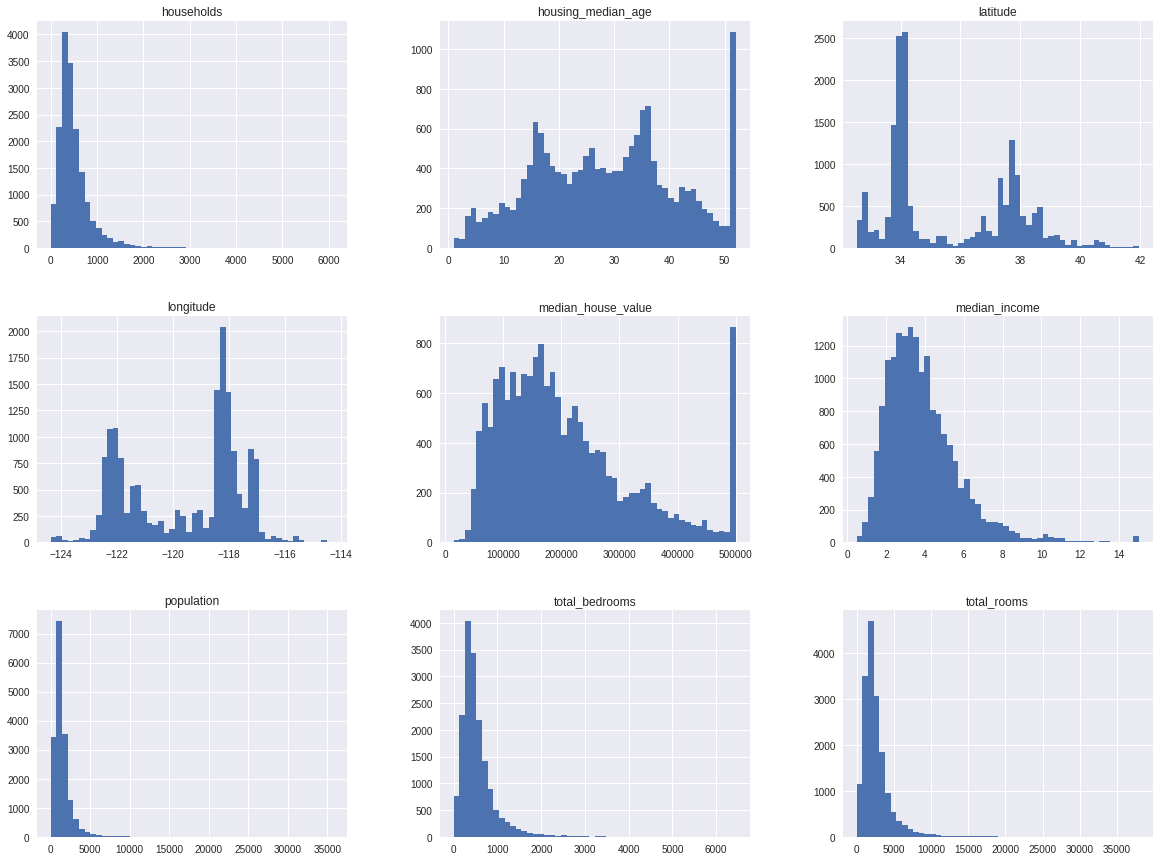

In [33]:
housing.hist(bins=50, figsize=(20,15))



1.   First, the median income attribute does not look like it is expressed in US dollars (USD)
2.   The housing median age and the median house value were also capped. The latter may be a serious problem since it is your target attribute (your labels)
3.  These attributes have very different scales.
4. Finally, many histograms are tail heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.



In [34]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Visualizing Geographical Data

ince there is geographical information (latitude and longitude), it is a good idea to create a scatterplot of all districts to visualize the data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


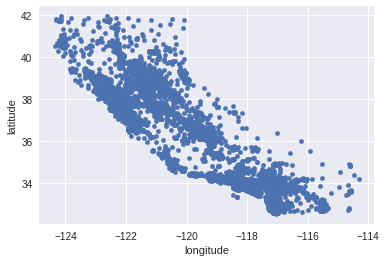

In [35]:
 housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


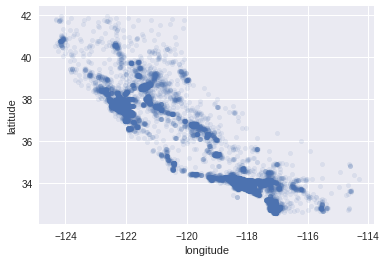

In [36]:
 housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


Now let’s look at the housing prices (Figure 2-13). The radius of each circle represents the district’s population (option s), and the color represents the price (option c). We will use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices)

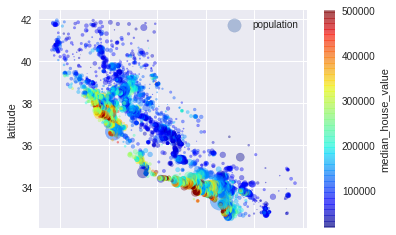

In [38]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
         s=housing["population"]/100, label="population",
         c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
     )
plt.legend()


Since the dataset is not too large, you can easily compute the standard correlation coefficient (also called Pearson’s r) between every pair of attributes using the corr() method:

In [0]:
corr_matrix = housing.corr()

In [45]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.691871
total_rooms           0.130991
housing_median_age    0.106758
households            0.061031
total_bedrooms        0.045783
population           -0.027850
longitude            -0.044982
latitude             -0.144917
Name: median_house_value, dtype: float64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efec2733860>,
      dtype=object)

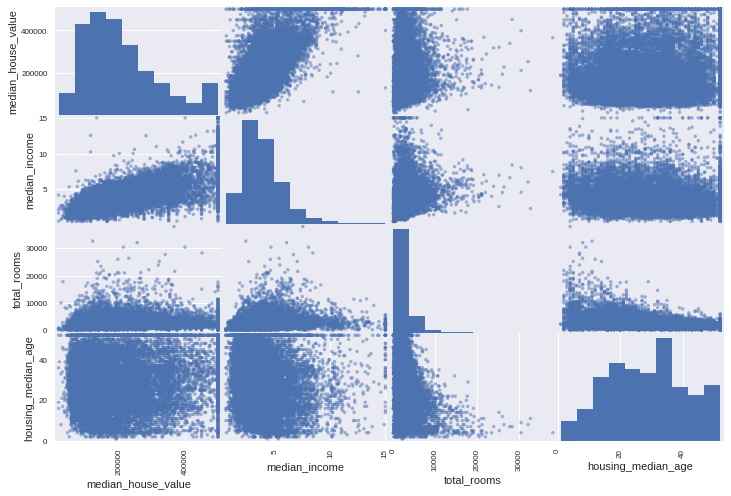

In [48]:
from pandas.tools.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
                  "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))


The main diagonal (top left to bottom right) would be full of straight lines if Pandas plotted each variable against itself, which would not be very useful. So instead Pandas displays a histogram of each attribute (other options are available; see Pandas’ docu‐ mentation for more details).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


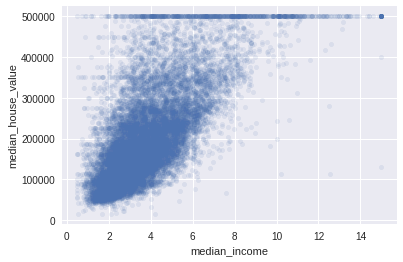

In [49]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
                 alpha=0.1)